# Part A

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Dataset

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Dataframe Info

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Missing Values Check

Check that there are not missing or na values.

The dataframe inclues 768 rows and each feature includes 768 non-null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Plot Variables

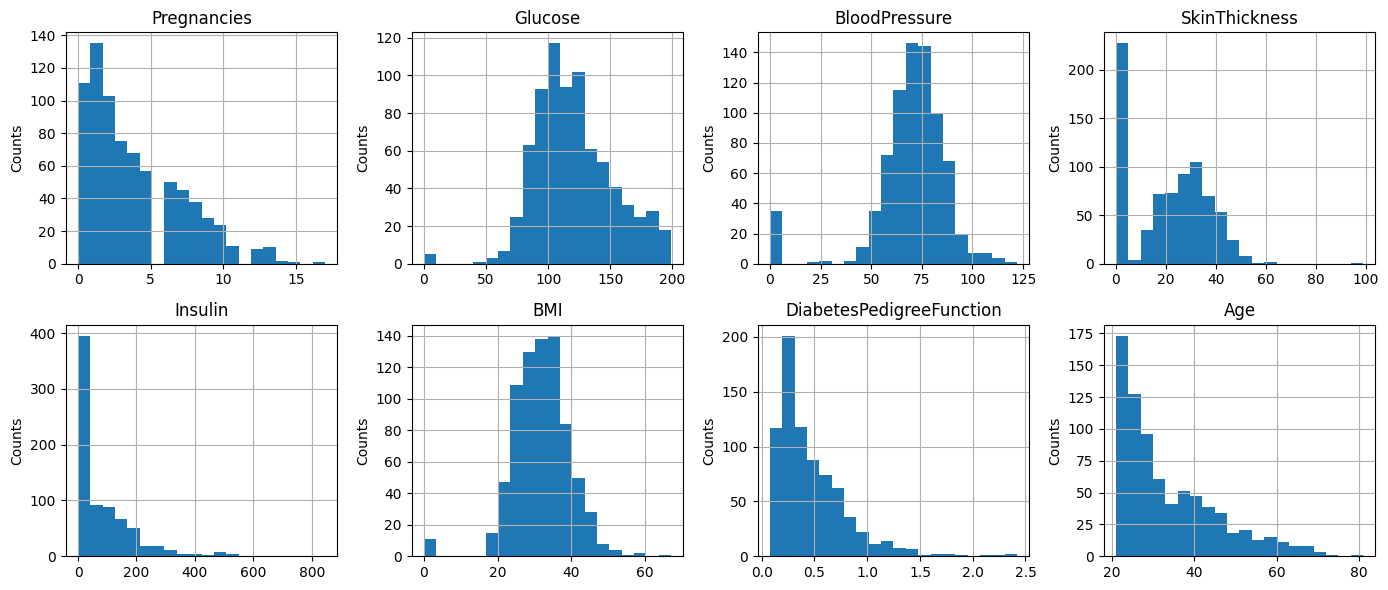

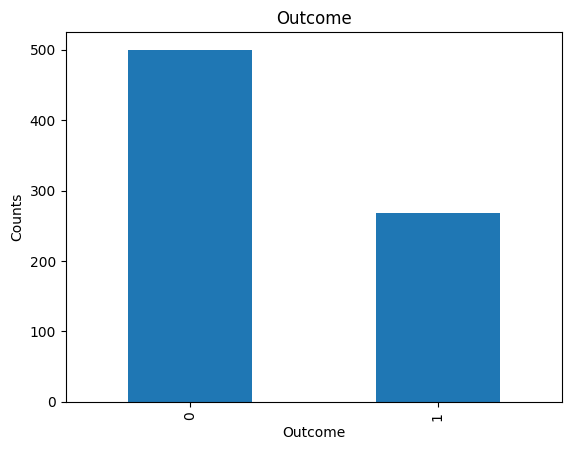

In [ ]:
features = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
]
y = "Outcome"
df.columns

fix, axes = plt.subplots(2, 4, figsize=(14, 6))
axes = axes.flatten()
for i in range(len(features)):
    axes[i].hist(df[features[i]], bins=20)
    axes[i].set_title(features[i])
    axes[i].set_ylabel("Counts")
    axes[i].grid()

plt.tight_layout()
plt.show()

# Count values in 'Outcome' column
df["Outcome"].value_counts().plot(kind="bar")
plt.ylabel("Counts")
plt.title("Outcome")
plt.show()

### Ερώτηση 2
Αρχικά, παρατηρούμε ότι δεν έχουμε missing values για κανενα απο τα διαθεσιμα features.

Παρατηρώντας τις κατανομές των features, βλέπουμε ότι έχουμε 4 features (Pregnancies, Insulin, DiabetesPedigreeFunction, Age) τα οποία δείχνουν να έχουν μια right skewed κατανομη. Όπως βλέπουμε για αυτά τα features, οι περισσότερες τιμές συγκεντρώνονται στα αριστερά του πάνελ κάτι που σημαίνει ότι το δείγμα μας αποτελείται κυρίως απο 'μικρές' τιμές.

Για τα features Insulin και SkinThickness βλέπουμε ότι υπάρχει μια μεγάλη συγκέντρωση τιμών στο 0. Αυτό το γεγονός, και δεδομένου ότι μιλάμε για μοντέλα παλινδρόμησης και δεν έχουμε κάνει κάποιον επιπλέον μετασχηματισμό, μπορεί να επηρεάσει αρνητικά τα αποτελέσματα και την εκπαίδευση του μοντέλου, ειδικά για το Insulin το οποίο εμφανίζει και μεγάλη τυπική απόκλιση.

Συνεχίζοντας, βλέπουμε ότι υπάρχουν rows με μηδενικό BloodPressure(35 rows), Glucose (5 rows), BMI (11 rows). Έπειτα απο ένα απλό Google Search μάλλον οι συγκεκριμένες γραμμές αφορούν λανθασμένες μετρήσεις καθώς δεν είναι δυνατόν κάποιος/κάποια να έχει μηδενικές τιμές σε αυτά τα features.

Τέλος, παρατηρούμε ότι τα features Glucose, BloodPressure, SkinThickness, BMI τείνουν να έχουν κανονική κατανομή, κάτι το οποίο θα βοηθήσει το μοντέλο να υπολογίσει καλύτερα και ευκολότερα τα βάρη για κάθε feature.

### Ερώτηση 3
Όπως αναφέρθηκε και πάνω, το feature Age ακολουθεί μια right skewed κατανομή. Το γεγονός αυτό, δεν μας βοηθάει στη μοντελοποίηση καθώς δείχνει ότι το δείγμα μας δεν είναι αντιπροσωπευτικό αλλά αποτελείται κυρίως απο δεδομένα που αφορούν άτομα νεαρής ηλικίας. Επομένως, το μοντέλο μας θα περιλαμβάνει ενα bias και δεν θα έχει μεγάλη αξιοπιστία στις προβλέψεις για άτομα μεγάλης ηλικίας, αφού δεν είχε αρκετά μεγάλο δείγμα τέτοιων ατόμων για την εκπαίδευσή του.


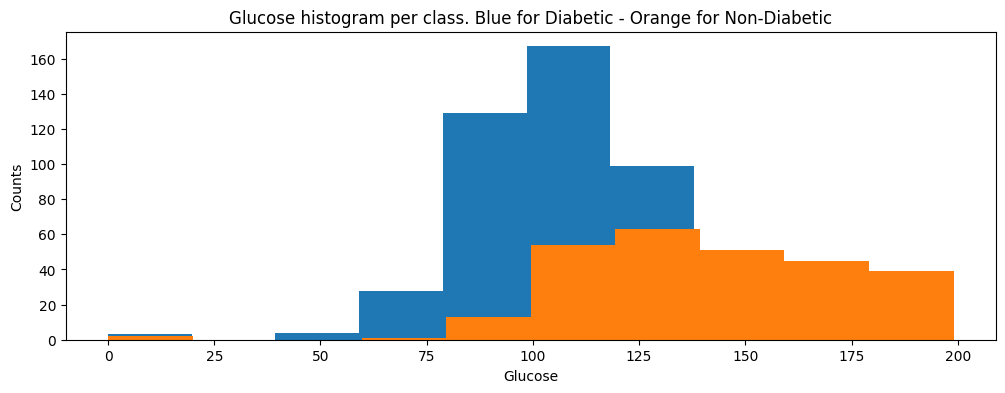

In [ ]:
plt.figure(figsize=(12, 4))
plt.hist(df[df["Outcome"] == 0]["Glucose"])
plt.hist(df[df["Outcome"] == 1]["Glucose"])
plt.ylabel("Counts")
plt.xlabel("Glucose")
plt.title("Glucose histogram per class. Blue for Diabetic - Orange for Non-Diabetic")
plt.show()


### Ερώτηση 4
Από το παραπάνω γράφημα δεν μπορούμε να επιβεβαιώσουμε τη συνεπαγωγή των κλινικών μελετών. Όπως παρατηρούμε, η κατανομή της γλυκόζης έχει ίδια μορφή και για τις δύο κλάσεις. Για να επιβεβαιώναμε αυτήν την συνεπαγωγή θα έπρεπε στην κλάση 0 να βλέπουμε μια μεγάλη συγκέντρωση στις μικρές τιμές και στην κλάση 1 μια μεγάλη συγκέντρωση στις μεγάλες τιμές.

# Logistic Regression Model Training

In [ ]:
input_df = df.drop(columns=["Outcome"])
targets_df = df["Outcome"]
seed = 0
# Use indices to preserve mapping
indices = input_df.index.to_numpy()

# Split to train/test set
x_train_idx, x_test_idx, y_train, y_test = train_test_split(
    indices, targets_df, test_size=0.3, random_state=seed
)

x_train = input_df.loc[x_train_idx].to_numpy()
x_test = input_df.loc[x_test_idx].to_numpy()

print(f"Train set - Rows: {x_train.shape[0]} - Features: {x_train.shape[1]}")
print(f"Test set - Rows: {x_test.shape[0]} - Features: {x_test.shape[1]}")

# Train model
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)


Train set - Rows: 537 - Features: 8
Test set - Rows: 231 - Features: 8


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Evaluate Model on test set

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy * 100, 2)

y_pred_train = model.predict(x_train)
accuracy_train_set = accuracy_score(y_pred_train, y_train)
accuracy_train_set_percentage = round(accuracy_train_set * 100, 2)
print(f"The accuracy of the model is: {accuracy_percentage}")
print(f"The accuracy of the model is: {accuracy_train_set_percentage}")

The accuracy of the model is: 77.92
The accuracy of the model is: 76.54


### Ερώτηση 6
Απο το παραπάνω cell βλέπουμε ότι τα αποτελέσματα τόσο για το train όσο και για το test είναι αρκετά κοντά. Επομένως, δεν έχει γίνει overfitting στα δεδομένα εκπαίδευσης.

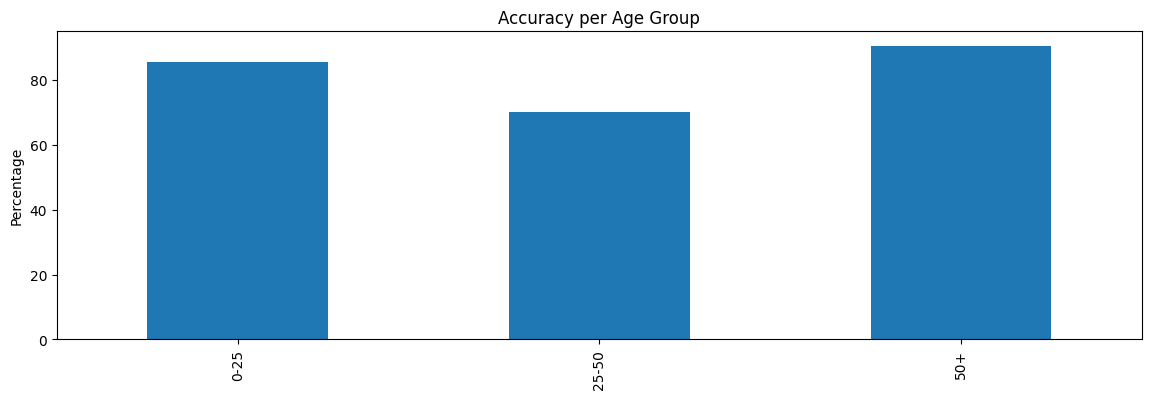

In [ ]:
predictions_df = input_df.loc[x_test_idx]
predictions_df["Prediction"] = y_pred
predictions_df["Outcome"] = y_test
df_0_25 = predictions_df[predictions_df["Age"] <= 25]
df_25_50 = predictions_df[(predictions_df["Age"] > 25) & (predictions_df["Age"] <= 50)]
df_50 = predictions_df[predictions_df["Age"] > 50]
accuracy_0_25 = round(
    accuracy_score(df_0_25["Prediction"], df_0_25["Outcome"]) * 100, 2
)
accuracy_25_50 = round(
    accuracy_score(df_25_50["Prediction"], df_25_50["Outcome"]) * 100, 2
)
accuracy_50 = round(accuracy_score(df_50["Prediction"], df_50["Outcome"]) * 100, 2)
accuracy_df = pd.DataFrame(
    {
        "accuracy": [accuracy_0_25, accuracy_25_50, accuracy_50],
    },
    index=["0-25", "25-50", "50+"],
)

# Count values in 'Outcome' column
plt.figure(figsize=(14, 4))
accuracy_df["accuracy"].plot(kind="bar")
plt.ylabel("Percentage")
plt.title("Accuracy per Age Group")
plt.show()

### Ερώτηση 7
Παρατηρούμε ότι υπάρχουν διαφορές στην απόδοση του ταξινομητή ανάλογα την ηλικία.

Η χειρότερη απόδοση παρατηρείται στις ηλικίες 25-50. Είναι περίεργο το ότι η καλύτερη απόδοση παρουσιάζεται στο γρκουπ 50+, το οποίο όπως είχαμε δει νωρίτερα αποτελεί μικρό μέρος του δείγματός μας. Αυτή η καλή απόδοση μπορεί να οφείλεται και στο μικρό σχετικά δείγμα που έχουμε.

### Ερώτηση 8
Εφόσον μιλάμε για ένα μοντέλο που κάνει προβλέψεις για κάποια ασθένεια, θεωρώ ότι είναι καλύτερο να προβλέψει ότι κάποιος πάσχει απο διαβήτη ενώ στην πραγματικότητα δεν πάσχει (False Positive) παρά να προβλέψει το αντίθετο (False Negative). Καταλήγουμε σε αυτό, καθώς αν προβλέψουμε λανθασμένα ότι κάποιος πάσχει απο διαβήτη ενώ δεν πάσχει κατά πάσα πιθανότητα θα κάνει περαιτέρω εξετάσεις που θα δείξουν ότι τελικά ειναι υγιής. Αντιθέτως, αν προβλέψουμε ότι κάποιος δεν πάσχει απο διαβήτη τότε μπορεί να μην προβεί σε άλλες εξετάσεις και εν συνεχεία η υγία του να επιδεινωθεί αφού θα πιστεύει ότι δεν έχει διαβήτη και δεν θα ακολουθήσει κάποια σχετική θεραπεία.

## Train with varying seed

In [ ]:
input_df = df.drop(columns=["Outcome"])
targets_df = df["Outcome"]

# Use indices to preserve mapping
indices = input_df.index.to_numpy()

accuracies = []
for seed in range(0, 10):
    # Split to train/test set
    x_train_idx, x_test_idx, y_train, y_test = train_test_split(
        indices, targets_df, test_size=0.3, random_state=seed
    )

    x_train = input_df.loc[x_train_idx].to_numpy()
    x_test = input_df.loc[x_test_idx].to_numpy()

    # Train model
    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_percentage = round(accuracy * 100, 2)
    accuracies.append(accuracy_percentage)


print(f"Mean Accuracy Percentage for seeds 0 to 9: {np.mean(accuracies):.2f}")
print(
    f"Standard Deviation Accuracy Percentage for seeds 0 to 9: {np.std(accuracies):.2f}"
)


Mean Accuracy Percentage for seeds 0 to 9: 77.27
Standard Deviation Accuracy Percentage for seeds 0 to 9: 1.87


In [ ]:
from sklearn.preprocessing import MinMaxScaler

input_df = df.drop(columns=["Outcome"])
targets_df = df["Outcome"]

# Use indices to preserve mapping
indices = input_df.index.to_numpy()

accuracies = []
coefficients = []
for seed in range(0, 10):
    # Split to train/test set
    x_train_idx, x_test_idx, y_train, y_test = train_test_split(
        indices, targets_df, test_size=0.3, random_state=seed
    )

    x_train = input_df.loc[x_train_idx].to_numpy()
    x_test = input_df.loc[x_test_idx].to_numpy()

    # Min-Max
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Train model
    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_percentage = round(accuracy * 100, 2)
    accuracies.append(accuracy_percentage)
    # Keep coefficients
    coefficients.append(model.coef_[0])

print(
    f"Mean Accuracy Percentage for seeds 0 to 9 after MinMax: {np.mean(accuracies):.2f}"
)
print(
    f"Standard Deviation Accuracy Percentage for seeds 0 to 9 after MinMax: {np.std(accuracies):.2f}"
)


Mean Accuracy Percentage for seeds 0 to 9 after MinMax: 76.97
Standard Deviation Accuracy Percentage for seeds 0 to 9 after MinMax: 2.25


# Feature Importance

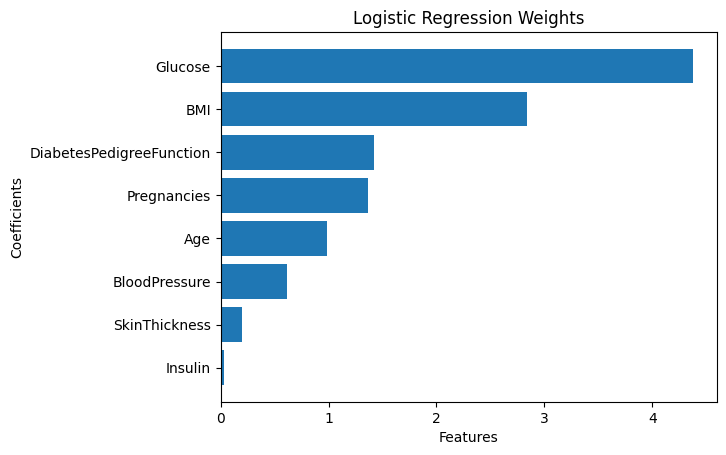

In [ ]:
importance_weights = np.abs(np.mean(coefficients, axis=0))
coef_df = pd.DataFrame({"Feature": input_df.columns, "Importance": importance_weights})
coef_df = coef_df.sort_values(by="Importance", ascending=True)
plt.barh(coef_df["Feature"], coef_df["Importance"])
plt.title("Logistic Regression Weights")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.show()

### Ερώτηση 10
Απο τα βάρη που ανατέθηκαν σε κάθε feature, φαίνεται ότι τα 3 πιο σημαντικά είναι τα Glucose, BMI, DiabetesPedigreeFunction. Το ότι αυτά τα features έχουν τα μεγαλύτερα βάρη σημαίνει ότι επηρεάζουν σε μεγάλο βαθμό την πρόβλεψη του μοντελου, και επομένως, θεωρούνται τα πιο σημαντικά για το μοντέλο. Παρατηρούμε επίσης, ότι 2 απο τα 3 ακολουθούν και κανονική κατανομή, κάτι που επιβεβαιώνει όσα περιγράφηκαν στα πρώτα ερωτήματα σχετικά με την ποιότητα των δεδομένων και των features.

# Part B

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

input_df = df.drop(
    columns=[
        "Outcome",
        "Glucose",
        "SkinThickness",
        "Insulin",
        "DiabetesPedigreeFunction",
    ]
)
targets_df = df["Glucose"]

# Use indices to preserve mapping
indices = input_df.index.to_numpy()

accuracies = []
seed = 0
# Split to train/test set
x_train_idx, x_test_idx, y_train, y_test = train_test_split(
    indices, targets_df, test_size=0.3, random_state=seed
)

x_train = input_df.loc[x_train_idx].to_numpy()
x_test = input_df.loc[x_test_idx].to_numpy()

# Train model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Compute errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")


MAE: 23.60
MSE: 929.89


### Ερώτηση 2
Στο συγκεκριμένο πρόβλημα πιστεύω ότι η χρήση του MAE είναι καλύτερη, καθώς το MSE είναι πολύ ευαίσθητο λόγω του τετραγώνου και εκτοξεύεται όταν το μοντέλο παρεκλίνει έστω και λίγο στις προβλέψεις του. Επίσης, το ΜΑΕ είναι και ευκολότερα ερμηνεύσιμο καθώς το 23.6 που υπολογίσαμε είναι εύκολο να ερμηνευθεί απο τον οποιονδήποτε και να κατανοήσει ότι οι προβλέψεις μας έχουν μέσο απόλυτο σφάλμα 23.6 μονάδες απο την πραγματική μέτρηση. Ειδικά σε αυτό το πρόβλημα που οι τιμές της γλυκόζης κυμαίνονται απο 0-199 και με Google Search βλέπουμε ότι τα όρια είναι (70,99), (100-125), (>125) το ΜΑΕ είναι αρκετά επεξηγηματικό.

Βέβαια, αν θέλαμε μεγάλη ακρίβεια και η απόκλιση ήταν αποδεκτή σε πολύ μικρά επίπεδα, ίσως να έπρεπε να παρατηρούμε το MSE έτσι ώστε να είναι ευκολότερο να παρατηρήσουμε ακόμα και πολύ μικρές μεταβολές οι οποίες θα ανεβάσουν το MSE πιο απότομα απ'ότι το ΜΑΕ.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

input_df = df.drop(
    columns=[
        "Outcome",
        "Glucose",
        "SkinThickness",
        "Insulin",
        "DiabetesPedigreeFunction",
    ]
)
targets_df = df["Glucose"]

# Use indices to preserve mapping
indices = input_df.index.to_numpy()

accuracies = []
seed = 0
# Split to train/test set
x_train_idx, x_test_idx, y_train, y_test = train_test_split(
    indices, targets_df, test_size=0.3, random_state=seed
)

x_train = input_df.loc[x_train_idx].to_numpy()
x_test = input_df.loc[x_test_idx].to_numpy()

# Train model
alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Compute errors
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"alpha={alpha} - MAE: {mae:.2f}")


alpha=0.2 - MAE: 23.59
alpha=0.4 - MAE: 23.59
alpha=0.6 - MAE: 23.58
alpha=0.8 - MAE: 23.58
alpha=1.0 - MAE: 23.57


### Ερώτημα 3

**Mean Absolute Error per Lasso alpha (λ) regularization parameter**

| Lasso alpha (λ) | Mean Absolute Error (MAE) |
|-----------------|---------------------------|
| 0.2             | 23.59                     |
| 0.4             | 23.59                     |
| 0.6             | 23.58                     |
| 0.8             | 23.58                     |
| 1.0             | 23.57                     |


In [ ]:
input_df.drop(columns=input_df.columns[np.argmin(model.coef_)], inplace=True)

# Use indices to preserve mapping
indices = input_df.index.to_numpy()

accuracies = []
seed = 0
# Split to train/test set
x_train_idx, x_test_idx, y_train, y_test = train_test_split(
    indices, targets_df, test_size=0.3, random_state=seed
)

x_train = input_df.loc[x_train_idx].to_numpy()
x_test = input_df.loc[x_test_idx].to_numpy()

# Train model
alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Compute errors
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"alpha={alpha} - MAE: {mae:.2f}")


alpha=0.2 - MAE: 23.58
alpha=0.4 - MAE: 23.58
alpha=0.6 - MAE: 23.58
alpha=0.8 - MAE: 23.57
alpha=1.0 - MAE: 23.57


### Ερώτημα 4

**Mean Absolute Error per Lasso alpha (λ) regularization parameter without 'Pregnancies' feature**

| Lasso alpha (λ) | Mean Absolute Error (MAE) |
|-----------------|---------------------------|
| 0.2             | 23.58                     |
| 0.4             | 23.58                     |
| 0.6             | 23.58                     |
| 0.8             | 23.57                     |
| 1.0             | 23.57                     |

Παρατηρούμε ότι αφού πετάξαμε το λιγότερο σημαντικό feature (Pregnancies) τα αποτελέσματα έμειναν σχεδόν τα ίδια και πολύ οριακά καλύτερα. Επομένως, ρίξαμε την πολυπλοκότητα του μοντέλου και δεν χάσαμε καθόλου απο την απόδοση.